In [11]:
import os
import sys
import math
import numpy as np
import pyfftw as ft 
import matplotlib
import matplotlib.pyplot as plt

In [12]:
filename = 'boxcount-enstrophy-shells-dims.npz'
content = np.load(filename)

In [13]:
tfboxes = content['tfboxes']

In [14]:
print(tfboxes.shape)

(12, 250)


In [15]:
eta = 0.00280
thresholds = [1,2,3,4,5,6,7,10,15,20,30,50]
colors = ['r','g','b','c','y','m','r','g','b','c','y','m']
scales = np.logspace(np.log(2*425*eta),np.log(0.1*42.5*eta), num=250, endpoint=True, base=np.e)

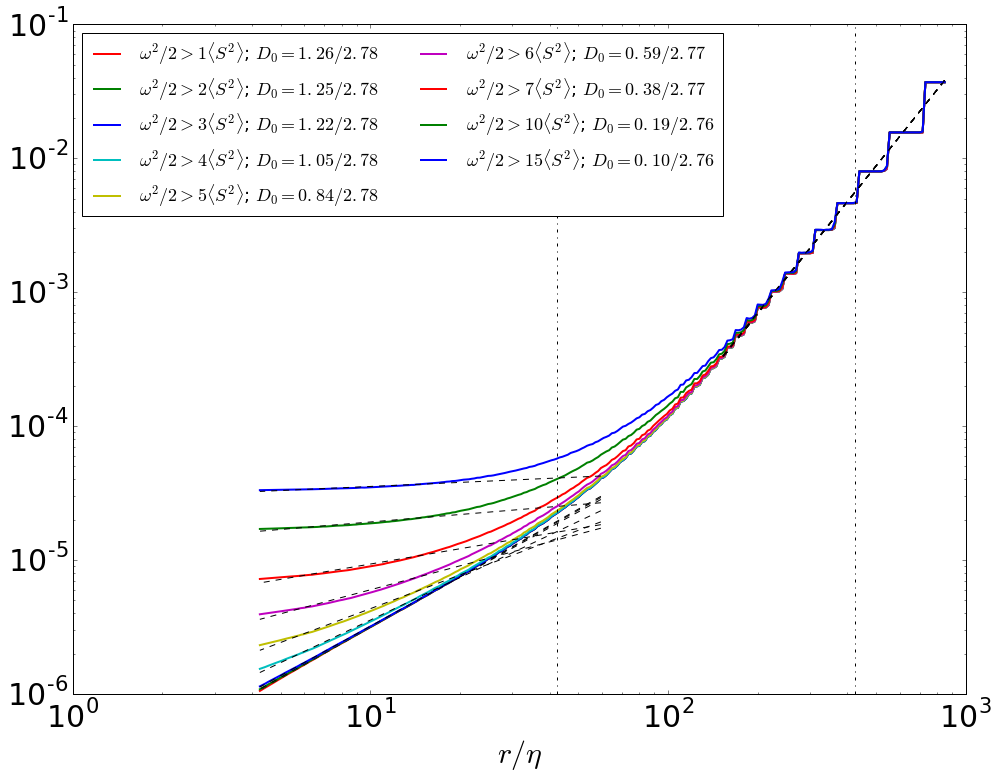

In [35]:
idx = scales<20.*eta #(scales>42.5*eta)&(scales<425*eta)
Idx = scales>250.*eta

fig = plt.figure(figsize=(16,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)      
plt.xlabel(r'$r/\eta$',size=30)
#plt.ylabel(r'$\langle \mu^2_\chi \rangle_r = \sum_i \int_$',size=35)
#plt.ylim([10**(-1),10**9])

for i in range(0,9,1):
    t = thresholds[i]
    c = colors[i]
        
    ct = np.array(tfboxes[i])
    
        
    fit = np.polyfit(np.log(scales[idx]),np.log(ct[idx]),1)    
    Fit = np.polyfit(np.log(scales[Idx]),np.log(ct[Idx]),1)
    
    plt.loglog(scales/eta,ct,c+'-', linewidth=2.0,label=r'$\omega^2/2 > {:6.0f}\langle S^2\rangle $; $D_0 = {:6.2f}/{:6.2f}$ '.format(t,fit[0],Fit[0]))
    plt.loglog(scales[scales<60*eta]/eta,np.exp(fit[1])*(scales[scales<60*eta]**(fit[0])),'k--')    
    plt.loglog(scales[scales>150*eta]/eta,np.exp(Fit[1])*(scales[scales>150*eta]**(Fit[0])),'k--')
    
plt.axvline(x=42.5,color='k', linestyle='-.')
plt.axvline(x=425.,color='k', linestyle='-.')
plt.legend(loc='upper left',prop={'size':18},ncol=2)
plt.savefig('boxcount-corr-dims-shells-thick.pdf')

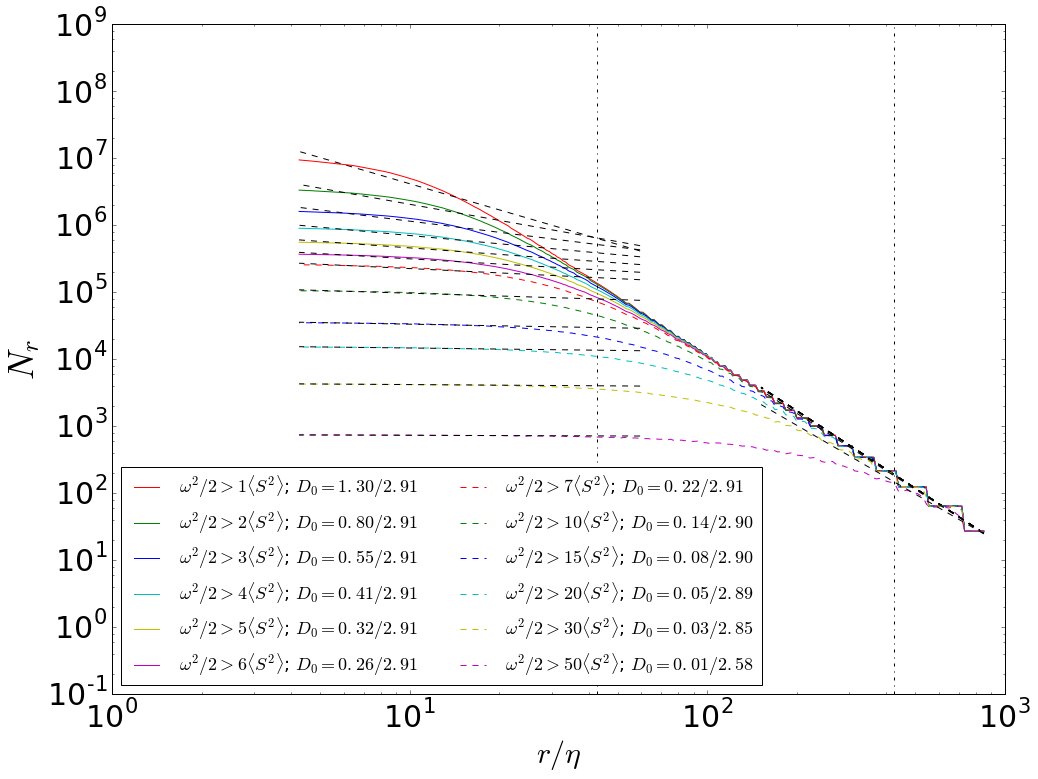

In [9]:
idx = scales<20.*eta #(scales>42.5*eta)&(scales<425*eta)
Idx = scales>450.*eta

fig = plt.figure(figsize=(16,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)      
plt.xlabel(r'$r/\eta$',size=30)
plt.ylabel(r'$N_r$',size=35)
plt.ylim([10**(-1),10**9])

for i in range(0,6,1):
    t = thresholds[i]
    c = colors[i]
        
    ct = np.array(tfboxes[i])
    
        
    fit = np.polyfit(np.log(scales[idx]),np.log(ct[idx]),1)    
    Fit = np.polyfit(np.log(scales[Idx]),np.log(ct[Idx]),1)
    
    plt.loglog(scales/eta,ct,c+'-',label=r'$\omega^2/2 > {:6.0f}\langle S^2\rangle $; $D_0 = {:6.2f}/{:6.2f}$ '.format(t,-fit[0],-Fit[0]))
    plt.loglog(scales[scales<60*eta]/eta,np.exp(fit[1])*(scales[scales<60*eta]**(fit[0])),'k--')    
    plt.loglog(scales[scales>150*eta]/eta,np.exp(Fit[1])*(scales[scales>150*eta]**(Fit[0])),'k--')
    
for i in range(6,12,1):
    t = thresholds[i]
    c = colors[i]
        
    ct = np.array(tfboxes[i])
    
        
    fit = np.polyfit(np.log(scales[idx]),np.log(ct[idx]),1)    
    Fit = np.polyfit(np.log(scales[Idx]),np.log(ct[Idx]),1)
    
    plt.loglog(scales/eta,ct,c+'--',label=r'$\omega^2/2 > {:6.0f}\langle S^2\rangle $; $D_0 = {:6.2f}/{:6.2f}$ '.format(t,-fit[0],-Fit[0]))
    plt.loglog(scales[scales<60*eta]/eta,np.exp(fit[1])*(scales[scales<60*eta]**(fit[0])),'k--')    
    plt.loglog(scales[scales>150*eta]/eta,np.exp(Fit[1])*(scales[scales>150*eta]**(Fit[0])),'k--')
    
plt.axvline(x=42.5,color='k', linestyle='-.')
plt.axvline(x=425.,color='k', linestyle='-.')
plt.legend(loc='lower left',prop={'size':18},ncol=2)
plt.savefig('boxcounting-dim-shells-1-3.pdf')

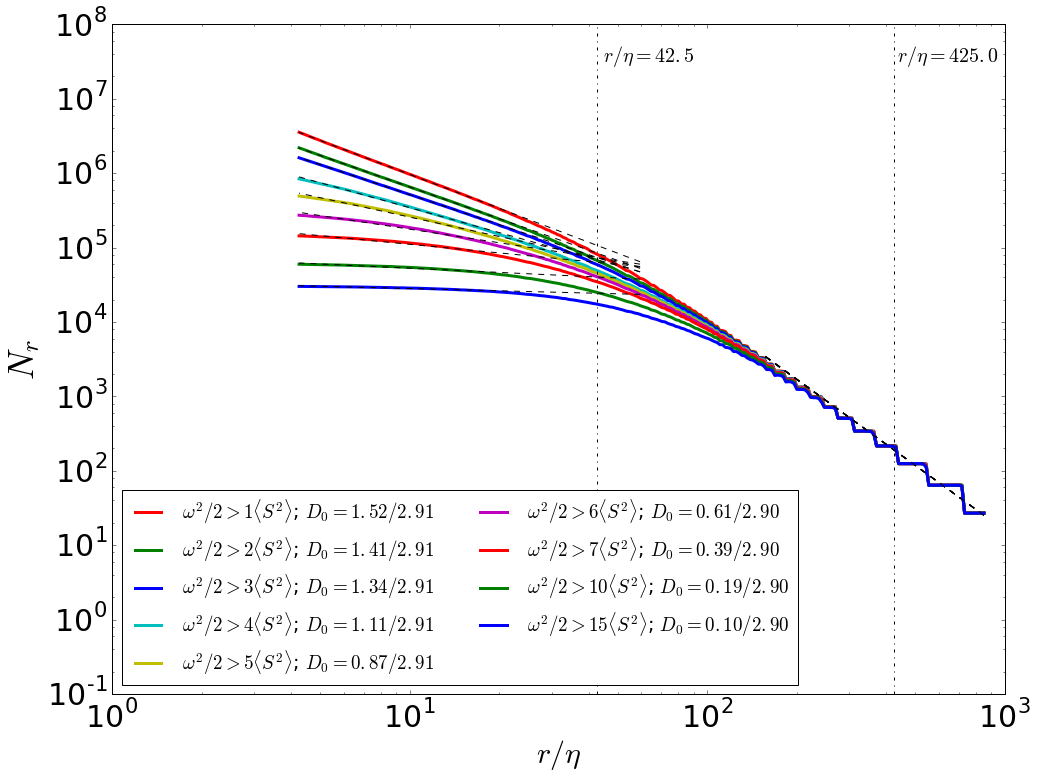

In [8]:
idx = scales<20.*eta 
Idx = scales>450.*eta

fig = plt.figure(figsize=(16,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)      
plt.xlabel(r'$r/\eta$',size=30)
plt.ylabel(r'$N_r$',size=35)
plt.ylim([10**(-1),10**8])

for i in range(0,9,1):
    t = thresholds[i]
    c = colors[i]
        
    ct = np.array(tfboxes[i])
    
        
    fit = np.polyfit(np.log(scales[idx]),np.log(ct[idx]),1)    
    Fit = np.polyfit(np.log(scales[Idx]),np.log(ct[Idx]),1)
    
    plt.loglog(scales/eta,ct,c+'-', linewidth=3.0,label=r'$\omega^2/2 > {:6.0f}\langle S^2\rangle $; $D_0 = {:6.2f}/{:6.2f}$ '.format(t,-fit[0],-Fit[0]))
    plt.loglog(scales[scales<60*eta]/eta,np.exp(fit[1])*(scales[scales<60*eta]**(fit[0])),'k--')    
    plt.loglog(scales[scales>150*eta]/eta,np.exp(Fit[1])*(scales[scales>150*eta]**(Fit[0])),'k--')
    
plt.axvline(x=42.5,color='k', linestyle='-.')
plt.axvline(x=425.,color='k', linestyle='-.')
plt.text(44.5, 10**(7.5), r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 10**(7.5), r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':19},ncol=2)
plt.savefig('Boxcount-dim-shells-enstrophy.pdf', format='pdf', bbox_inches='tight', transparent=True)

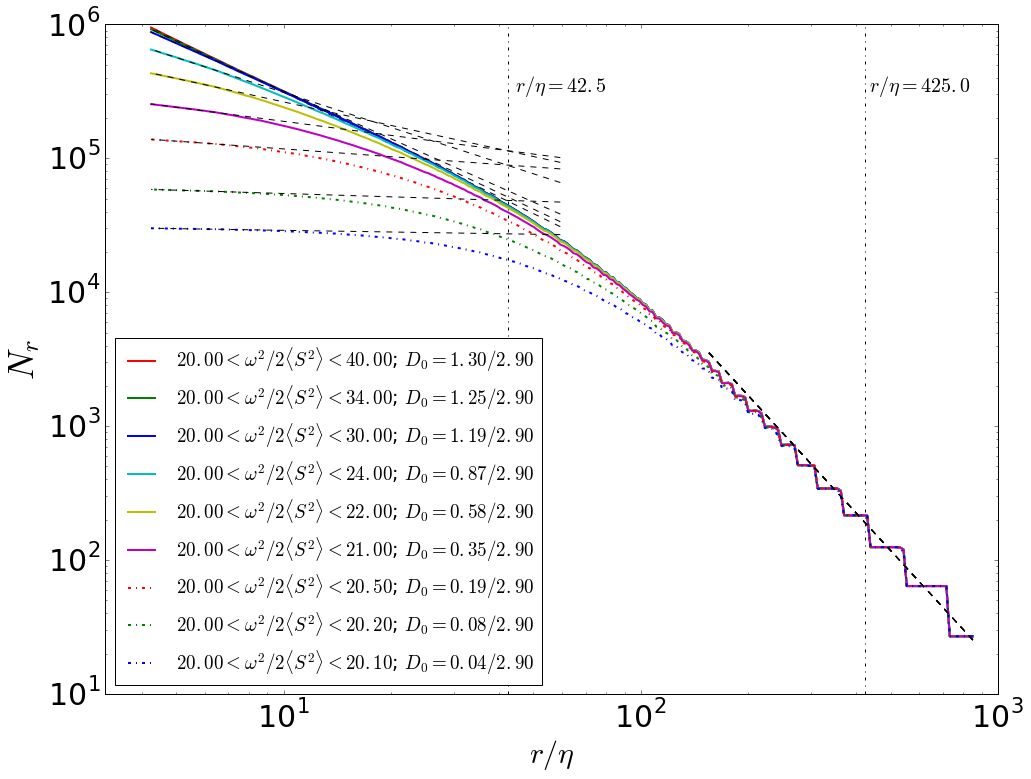

In [10]:
idx = scales<7.*eta 
Idx = scales>450.*eta

fig = plt.figure(figsize=(16,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)      
plt.xlabel(r'$r/\eta$',size=30)
plt.ylabel(r'$N_r$',size=35)
plt.xlim([10**(0.5),10**3])
#plt.ylim([10**(1),10**8])

dtl = [1.,0.7,0.5,0.2,0.1,0.05,0.025,0.01,0.005]
dt = 0.05

t=20
dt=0.05
for i in range(0,6,1):
    c = colors[i]
        
    ct = np.array(tfboxes[i])
    dt = dtl[i]
        
    fit = np.polyfit(np.log(scales[idx]),np.log(ct[idx]),1)    
    Fit = np.polyfit(np.log(scales[Idx]),np.log(ct[Idx]),1)
    
    plt.loglog(scales/eta,ct,c+'-', linewidth=2.0,label=r'${one:6.2f} < \omega^2/2\langle S^2\rangle < {ones:6.2f}  $; $D_0 = {two:6.2f}/{three:6.2f}$ '.format(one=t,ones=t*(1+dt),two=-fit[0],three=-Fit[0]))
    plt.loglog(scales[scales<60*eta]/eta,np.exp(fit[1])*(scales[scales<60*eta]**(fit[0])),'k--')    
    plt.loglog(scales[scales>150*eta]/eta,np.exp(Fit[1])*(scales[scales>150*eta]**(Fit[0])),'k--')
    
for i in range(6,9,1):
    c = colors[i]
        
    ct = np.array(tfboxes[i])
    dt = dtl[i]    
        
    fit = np.polyfit(np.log(scales[idx]),np.log(ct[idx]),1)    
    Fit = np.polyfit(np.log(scales[Idx]),np.log(ct[Idx]),1)
    
    plt.loglog(scales/eta,ct,c+'-.', linewidth=2.0,label=r'${one:6.2f} < \omega^2/2\langle S^2\rangle < {ones:6.2f}  $; $D_0 = {two:6.2f}/{three:6.2f}$ '.format(one=t,ones=t*(1+dt),two=-fit[0],three=-Fit[0]))
    plt.loglog(scales[scales<60*eta]/eta,np.exp(fit[1])*(scales[scales<60*eta]**(fit[0])),'k--')    
    plt.loglog(scales[scales>150*eta]/eta,np.exp(Fit[1])*(scales[scales>150*eta]**(Fit[0])),'k--')
    
plt.axvline(x=42.5,color='k', linestyle='-.')
plt.axvline(x=425.,color='k', linestyle='-.')
plt.text(44.5, 10**(5.5), r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 10**(5.5), r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':19})
plt.savefig('boxcount-dims-shells-thick.pdf')

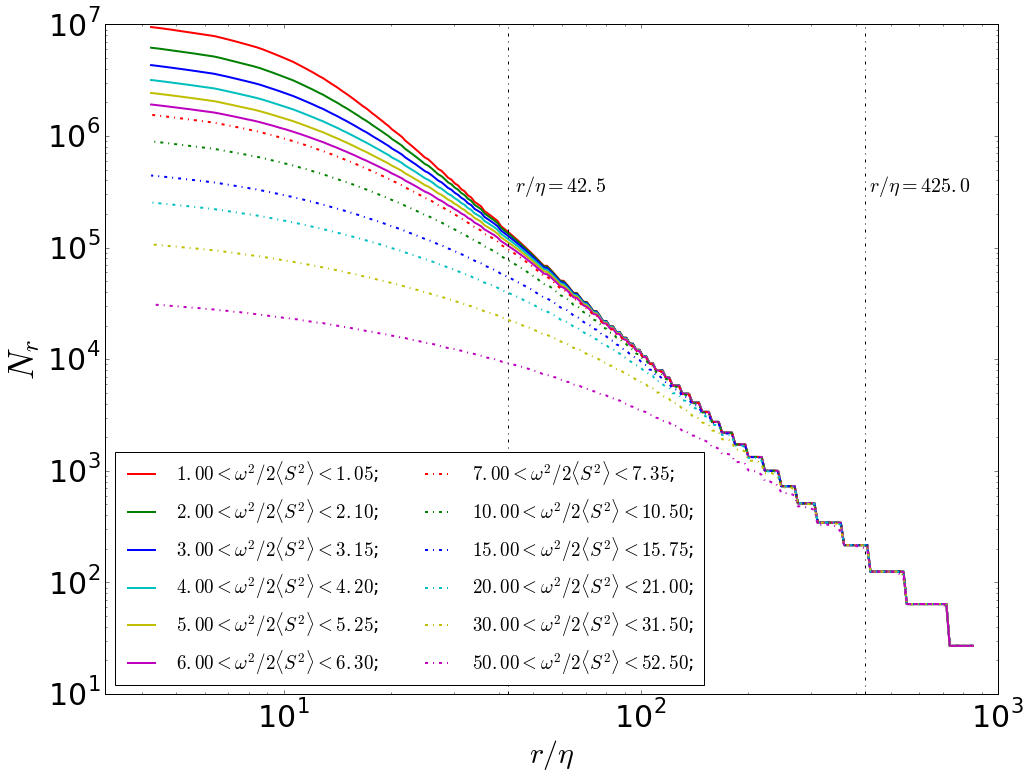

In [21]:
idx = scales<7.*eta 
Idx = scales>450.*eta

fig = plt.figure(figsize=(16,12))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)      
plt.xlabel(r'$r/\eta$',size=30)
plt.ylabel(r'$N_r$',size=35)
plt.xlim([10**(0.5),10**3])
#plt.ylim([10**(1),10**8])

tl = [1,2,3,4,5,6,7,10,15,20,30,50]
dtl = [1.,0.7,0.5,0.2,0.1,0.05,0.025,0.01,0.005]
dt = 0.05

t=20
dt=0.05
for i in range(0,6,1):
    c = colors[i]
        
    ct = np.array(tfboxes[i])
    #dt = dtl[i]
    t = tl[i]
        
    fit = np.polyfit(np.log(scales[idx]),np.log(ct[idx]),1)    
    Fit = np.polyfit(np.log(scales[Idx]),np.log(ct[Idx]),1)
    
    plt.loglog(scales/eta,ct,c+'-', linewidth=2.0,label=r'${one:6.2f} < \omega^2/2\langle S^2\rangle < {ones:6.2f}  $; '.format(one=t,ones=t*(1+dt),two=-fit[0],three=-Fit[0]))
    #plt.loglog(scales[scales<60*eta]/eta,np.exp(fit[1])*(scales[scales<60*eta]**(fit[0])),'k--')    
    #plt.loglog(scales[scales>150*eta]/eta,np.exp(Fit[1])*(scales[scales>150*eta]**(Fit[0])),'k--')
    
for i in range(6,12,1):
    c = colors[i]
        
    ct = np.array(tfboxes[i])
    #dt = dtl[i]
    t = tl[i]
        
    fit = np.polyfit(np.log(scales[idx]),np.log(ct[idx]),1)    
    Fit = np.polyfit(np.log(scales[Idx]),np.log(ct[Idx]),1)
    
    plt.loglog(scales/eta,ct,c+'-.', linewidth=2.0,label=r'${one:6.2f} < \omega^2/2\langle S^2\rangle < {ones:6.2f}  $; '.format(one=t,ones=t*(1+dt),two=-fit[0],three=-Fit[0]))
    #plt.loglog(scales[scales<60*eta]/eta,np.exp(fit[1])*(scales[scales<60*eta]**(fit[0])),'k--')    
    #plt.loglog(scales[scales>150*eta]/eta,np.exp(Fit[1])*(scales[scales>150*eta]**(Fit[0])),'k--')
    
plt.axvline(x=42.5,color='k', linestyle='-.')
plt.axvline(x=425.,color='k', linestyle='-.')
plt.text(44.5, 10**(5.5), r'$r/\eta = 42.5$', fontsize=20)
plt.text(435., 10**(5.5), r'$r/\eta = 425.0$', fontsize=20)
plt.legend(loc='lower left',prop={'size':19},ncol=2)
plt.savefig('boxcount-dims-shells.pdf')